In [1]:
from RBF_Net import RBF_Net
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.arange(0, 2*math.pi, 0.1)
X_train = X_train.reshape(1, X_train.shape[0])

X_test = np.arange(0.05, 2*math.pi, 0.1)
X_test = X_test.reshape(1, X_test.shape[0])

In [3]:
def sin_2(x):
    return np.sin(2*x)

In [4]:
f_train = sin_2(X_train)
f_test = sin_2(X_test)

In [5]:
f_train

array([[ 0.        ,  0.19866933,  0.38941834,  0.56464247,  0.71735609,
         0.84147098,  0.93203909,  0.98544973,  0.9995736 ,  0.97384763,
         0.90929743,  0.8084964 ,  0.67546318,  0.51550137,  0.33498815,
         0.14112001, -0.05837414, -0.2555411 , -0.44252044, -0.61185789,
        -0.7568025 , -0.87157577, -0.95160207, -0.993691  , -0.99616461,
        -0.95892427, -0.88345466, -0.77276449, -0.63126664, -0.46460218,
        -0.2794155 , -0.0830894 ,  0.1165492 ,  0.31154136,  0.49411335,
         0.6569866 ,  0.79366786,  0.8987081 ,  0.96791967,  0.99854335,
         0.98935825,  0.94073056,  0.85459891,  0.7343971 ,  0.58491719,
         0.41211849,  0.22288991,  0.02477543, -0.17432678, -0.36647913,
        -0.54402111, -0.69987469, -0.82782647, -0.92277542, -0.98093623,
        -0.99999021, -0.97917773, -0.91932853, -0.82282859, -0.69352508,
        -0.53657292, -0.35822928, -0.16560418]])

Number of nodes: 1, Error: 0.5700164614945218
Number of nodes: 2, Error: 0.5053704490266551
Number of nodes: 3, Error: 0.5054840359406021
Number of nodes: 4, Error: 0.38109852076837347
Number of nodes: 5, Error: 0.4390091604940275
Number of nodes: 6, Error: 0.0714816221093025
Number of nodes: 7, Error: 0.036163698296211334
Number of nodes: 8, Error: 0.010492746164593636
Number of nodes: 9, Error: 0.008406063356286061
Number of nodes: 10, Error: 0.0014598133929936924
Number of nodes: 11, Error: 0.001090883359391736
Number of nodes: 12, Error: 0.00011941225797053368
Number of nodes: 13, Error: 4.412667408617867e-05
Number of nodes: 14, Error: 4.677355038346682e-05
Number of nodes: 15, Error: 0.00023296961025228398
Number of nodes: 16, Error: 0.00011842576645030506
Number of nodes: 17, Error: 0.00010097551133798227
Number of nodes: 18, Error: 0.00023558536745277336
Number of nodes: 19, Error: 0.00016492471356641675
Number of nodes: 20, Error: 0.00011147415436788396
Number of nodes: 21, Er

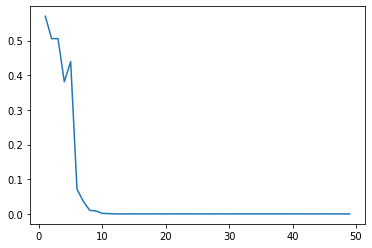

In [6]:
dim_list = list(range(1, 50))
errors = []
for H_dim in dim_list:
    rbf_net = RBF_Net(X_train, f_train.T, H_dim, weight_learn = 'ls', CL = False)
    rbf_net.train()
    f_approx = rbf_net.predict(X_test).flatten()
    test_error = np.mean(np.abs(f_approx - f_test))
    errors.append(test_error)
    print("Number of nodes: {}, Error: {}".format(H_dim, test_error))
plt.plot(dim_list, errors)

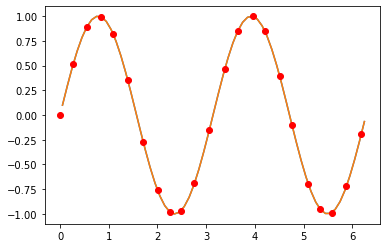

In [9]:
rbf_net = RBF_Net(X_train, f_train.T, 23)
rbf_net.train()
f_approx = rbf_net.predict(X_test).flatten()
plt.plot(X_test[0], f_test[0])
plt.plot(X_test[0], f_approx)
plt.plot(rbf_net.mus, sin_2(rbf_net.mus), 'bo', color = 'r')